In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [3]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 1us/step


In [4]:
# Show a sample of data (no reshaping or plotting)
print("Sample image pixel values (first item):")
print(x_train[0])
print("Corresponding label:", y_train[0])

Sample image pixel values (first item):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   

In [5]:
# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:

# Build the model (DNN version)
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 categories
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model and store history
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64, verbose=1)

Epoch 1/10


750/750 [==============================] - 5s 5ms/step - loss: 0.5469 - accuracy: 0.8097 - val_loss: 0.4407 - val_accuracy: 0.8435
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3942 - accuracy: 0.8577 - val_loss: 0.3858 - val_accuracy: 0.8621
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3455 - accuracy: 0.8738 - val_loss: 0.3697 - val_accuracy: 0.8642
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3207 - accuracy: 0.8811 - val_loss: 0.3396 - val_accuracy: 0.8781
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3061 - accuracy: 0.8872 - val_loss: 0.3590 - val_accuracy: 0.8686
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2849 - accuracy: 0.8941 - val_loss: 0.3635 - val_accuracy: 0.8767
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2741 - accuracy: 0.8977 - val_loss: 0.3178 - val_accuracy: 0.8874
Epoc

In [9]:
# Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3744 - accuracy: 0.8751

Test Accuracy: 0.88


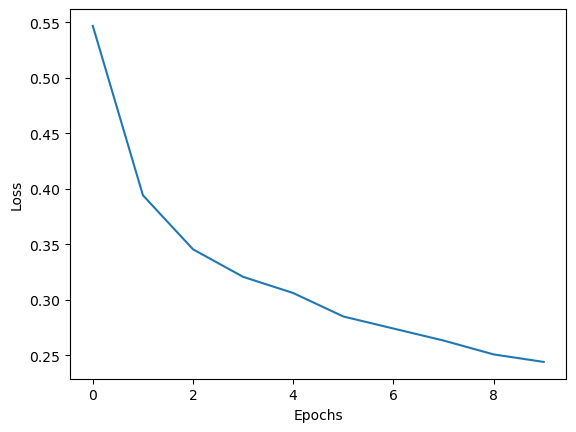

In [11]:

# Plot only training loss
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()